<a href="https://colab.research.google.com/github/usmankhawar22/Covid-19-Analysis/blob/master/final_deliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MUHAMMAD USMAN KHAWAR
BESE-8B
208775

Before it turns out to be a plagerised assigments, the preprocessing part is solely done by my me, for the forecasting model it does include peer help, precisely for the future predictions according to no. of days i.e 30.
Alot of code snippets could be found in the following URLS that have been used after thorough understanding of concepts, It will be grossly unfair to award zero marks (as done in previos assignements),it took precisely 6 days to complete still having the issues of negative predictions, which I couldn't still understand why.

Links

https://www.curiousily.com/posts/time-series-forecasting-with-lstm-for-daily-coronavirus-cases/

https://stackabuse.com/time-series-prediction-using-lstm-with-pytorch-in-python/

https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_recurrent_neuralnetwork/ (for the model)

#Data Processing

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('time_series_covid_19_confirmed.csv')
df.drop(['Lat', 'Long'],axis=1,inplace=True)
df

,Province/State,Country/Region,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,...,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208,208,208,220,235,235,235,235,246,251,251,251,251,251,251,299,441,443
262,NaN,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197,209,212,222,233,249,256
263,NaN,Comoros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11,11,11,11,11,11,11,11,11,11,34,34,78,78,87,87,87,87
264,NaN,Tajikistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,15,15,76,128,230,293,379,461,522,612,612,661,729,801,907,1118,1322,1524,1729,1936,2140,2350,2551,2738,2929,3100,3266,3424


In [0]:
df=df.groupby(['Country/Region']).sum().reset_index()
df=df.groupby(['Country/Region'])

In [0]:
countries=list(df.groups.keys())


Pakistan's Data

In [0]:
pak_values=np.array(df.get_group('Pakistan').iloc[:,1:])
pak_values=np.trim_zeros(pak_values[0])
print(len(pak_values))
pak_values




92


array([    2,     2,     2,     4,     4,     4,     5,     5,     5,
           6,     6,     6,     6,    16,    19,    20,    28,    31,
          53,   136,   236,   299,   454,   501,   730,   776,   875,
         972,  1063,  1201,  1373,  1495,  1597,  1717,  1938,  2118,
        2421,  2686,  2818,  3157,  3766,  4035,  4263,  4489,  4695,
        5011,  5230,  5496,  5837,  6383,  6919,  7025,  7638,  8348,
        8418,  9565, 10076, 11155, 11940, 12723, 13328, 13915, 14612,
       15525, 16817, 18114, 19103, 20084, 20941, 22049, 24073, 24644,
       26435, 28736, 30334, 32081, 34336, 35298, 35788, 38799, 38799,
       40151, 42125, 43966, 45898, 48091, 50694, 52437, 54601, 56349,
       57705, 59151])

making data consistant and comparable with pakistan

In [0]:

validCountries = list()
country_values=list()

for c in countries:
  day_values=np.array(df.get_group(c).iloc[:,1:])
  # print(day_values)
  day_values=np.trim_zeros(day_values[0])
  if len(day_values) < len(pak_values):
    continue
  if len(day_values) > len(pak_values):
    day_values = day_values[:len(pak_values)]
  validCountries.append(c)
  country_values.append(day_values)

#data frame wrt to total new cases reported on that day
dates=list()
for i in range(len(pak_values)):
  dates.append("day"+str(i+1))



df_countries=pd.DataFrame(country_values, columns = dates, index=validCountries)





  




    

In [0]:
df_countries

,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,day11,day12,day13,day14,day15,day16,day17,day18,day19,day20,day21,day22,day23,day24,day25,day26,day27,day28,day29,day30,day31,day32,day33,day34,day35,day36,day37,day38,day39,day40,...,day53,day54,day55,day56,day57,day58,day59,day60,day61,day62,day63,day64,day65,day66,day67,day68,day69,day70,day71,day72,day73,day74,day75,day76,day77,day78,day79,day80,day81,day82,day83,day84,day85,day86,day87,day88,day89,day90,day91,day92
Afghanistan,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,...,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173
Algeria,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697
Australia,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,30,39,52,55,...,568,681,791,1071,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862,5116,5330,5550,5687,5797,5895,6010,6108,6215,6303,6315,6351,6415,6440,6462,6522,6568,6610,6623,6645,6652,6662,6677,6694,6714
Austria,2,2,3,3,9,14,18,21,29,41,55,79,104,131,182,246,302,504,655,860,1018,1332,1646,2013,2388,2814,3582,4474,5283,5588,6909,7657,8271,8788,9618,10180,10711,11129,11524,11781,...,14595,14671,14749,14795,14873,14925,15002,15071,15148,15225,15274,15357,15402,15452,15531,15558,15597,15621,15650,15684,15752,15774,15833,15871,15882,15961,15997,16058,16109,16201,16242,16269,16321,16353,16404,16436,16486,16503,16539,16557
Bahrain,1,23,33,33,36,41,47,49,49,52,55,60,85,85,95,110,195,195,195,210,214,214,228,256,278,285,305,334,377,392,419,458,466,476,499,515,567,569,643,672,...,1700,1740,1773,1881,1907,1973,2027,2217,2518,2588,2647,2723,2811,2921,3040,3170,3284,3383,3533,3720,3934,4199,4444,4774,4941,5236,5531,5816,6198,6583,6747,6956,7184,7532,7888,8174,8414,8802,9138,9171
Belgium,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,8,13,23,50,109,169,200,239,267,314,314,559,689,...,7284,9134,10836,11899,12775,13964,15348,16770,18431,19691,20814,22194,23403,24983,26667,28018,29647,30589,31119,33573,34809,36138,37183,38496,39983,40956,41889,42797,44293,45325,46134,46687,47334,47859,48519,49032,49517,49906,50267,50509
Brazil,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,11130,...,36658,38654,40743,43079,45757,50036,54043,59324,63100,67446,73235,79685,87187,92202,97100,101826,108620,115455,126611,135773,146894,156061,162699,169594,178214,190137,203165,220291,233511,241080,255368,271885,291579,310087,330890,347398,363211,374898,391222,411821
Cambodia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,37,51,53,84,87,91,96,96,99,99,103,107,109,109,110,114,114,114,114,115,117,119,119,120,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
Canada,1,1,2,2,2,4,4,4,4,4,5,5,7,7,7,7,7,7,7,7,7,7,8,8,8,8,9,9,9,10,11,11,13,14,20,24,27,30,33,37,...,657,800,943,1277,1469,2088,2790,3251,4042,4682,5576,6280,7398,8527,9560,11284,12437,12978,15756,16563,17872,19141,20654,22059,23316,24299,25680,27035,28209,30809,32814,34356,35633,37658,39402,41663,43299,44919,46371,48033
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,...,80977,81003,81033,81058,81102,81156,81250,81305,81435,81498,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432,82511,82543,82602,82665,82718,82809,82883,82941,83014,8

In [0]:
validCountries.remove('Pakistan')

#finding correlation to predict closest trends

In [0]:
corr_list=list()
for c in validCountries:
  xd=abs(np.sum(df_countries.loc['Pakistan'] - df_countries.loc[c]))
  corr_list.append(xd)

In [0]:
corr_list

In [0]:
corr_df = pd.DataFrame({'index':validCountries, 'Relation':corr_list})
trendDf = corr_df.nlargest(5, 'Relation')
top5Countries = trendDf['index'].tolist()
print("The top 5 countries with same trend as Pakistan are", top5Countries)

The top 5 countries with same trend as Pakistan are ['US', 'Brazil', 'Spain', 'Italy', 'China']


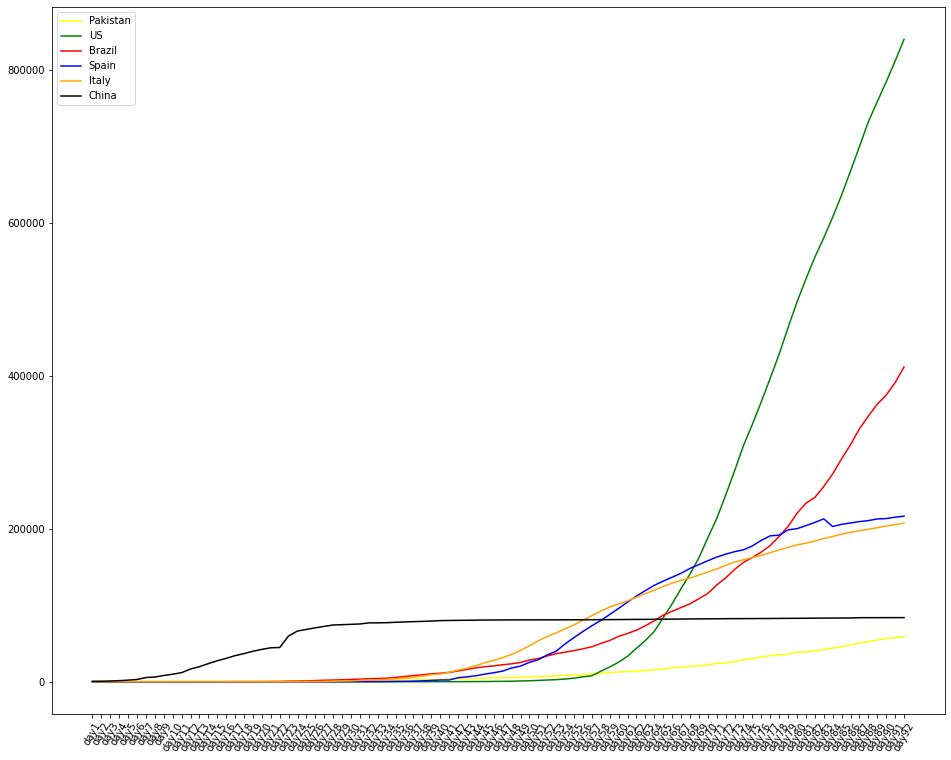

In [0]:
import matplotlib.pyplot as plt
colors = ['green', 'red', 'blue', 'orange', 'black', 'yellow', 'purple', 'aqua', 'magenta', 'blue']

fig= plt.figure(figsize=(16,13))
plt.xticks(rotation=60)
plt.plot(dates, df_countries.loc["Pakistan"], color=colors[5], label="Pakistan")

for i in range(5):
  plt.plot(dates, df_countries.loc[top5Countries[i]], color=colors[i], label=top5Countries[i])


plt.legend()
plt.show()

the trends aren't closed as finded by correlation, we will use approach of absolute differences of array

In [0]:
absoluteDiff = list()

for c in validCountries:
    countryD = list(np.array(df_countries.loc[c]))
    differenceArray=np.sum(np.absolute(pak_values-np.array(countryD)))
    absoluteDiff.append(differenceArray)

In [0]:

top5Countries = np.array(validCountries)[np.argsort(np.array(absoluteDiff))[:5]]
top5Countries

array(['Belgium', 'Canada', 'Romania', 'Israel', 'Russia'], dtype='<U20')

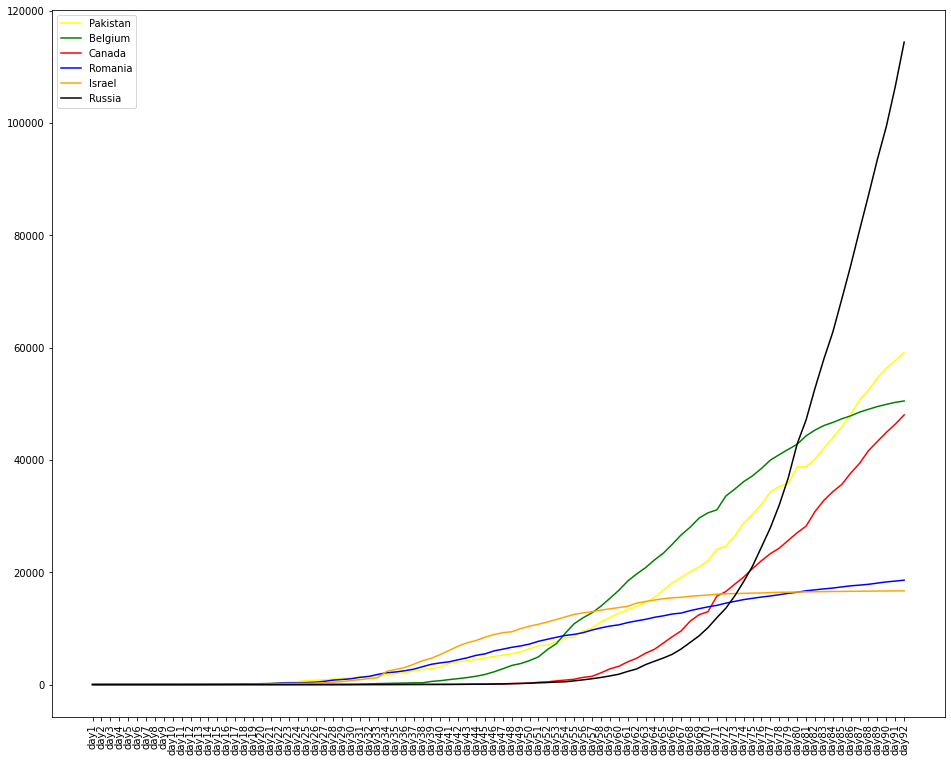

In [0]:
import matplotlib.pyplot as plt
colors = ['green', 'red', 'blue', 'orange', 'black', 'yellow', 'purple', 'aqua', 'magenta', 'blue']

fig= plt.figure(figsize=(16,13))
plt.xticks(rotation=90)
plt.plot(dates, df_countries.loc["Pakistan"], color=colors[5], label="Pakistan")

for i in range(5):
  plt.plot(dates, df_countries.loc[top5Countries[i]], color=colors[i], label=top5Countries[i])


plt.legend()
plt.show()

#PRE PROCEESing for RNN

our code is commultative, so in order to convert it to indivual entities we define this function

In [0]:
def Individualdays(arr):
    
    IndArray = [arr[0]]
    
    for i in range(len(arr)-1):
        IndArray.append(arr[i+1] - arr[i])

    return np.array(IndArray)

In [0]:

def preprocess(DayList, scaler):


    normalized=scaler.fit_transform(DayList.reshape(-1, 1))

    
    x, y = create_sequences(normalized, seq_length)
    
    x_train= x[:trainSize] 
    y_train= y[:trainSize]
    
    x_vld = x[trainSize-seq_length:]
    
    last = x[-1]
    
    x_train = Variable(torch.Tensor(x_train))
    
    x_vld = Variable(torch.Tensor(x_vld))
    
    y_train = Variable(torch.Tensor(y_train)).view(-1, 1)
    
    return x_train, y_train, x_vld, last

In [0]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

#Forecasting model

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [0]:

class CoronaVirusPredictor(nn.Module):

  def __init__(self, n_features, n_hidden, n_layers=3, output_dim=1):
    super(CoronaVirusPredictor, self).__init__()

    self.hidden_dim = n_hidden
    self.layer_dim = n_layers
    self.rnn = nn.RNN(n_features, n_hidden, n_layers, batch_first=True, nonlinearity='relu')

    self.linear = nn.Linear(n_hidden, output_dim)

    
  def forward(self, x):

    h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
    out, hn = self.rnn(x, h0)
    out = self.linear(out[:, -1, :])
    
    return out









## Training

Let's build a helper function for the training of our model (we'll reuse it later):

In [0]:

def trainModel(model,train_data, train_labels):

    model.train()
    
    loss = 0
    
    optimiser = torch.optim.Adam(model.parameters(), 0.002)
    epochs = 600

    error = nn.MSELoss()
    
    for epoch in range(epochs):

        
        optimiser.zero_grad()
        out = model(train_data, )
        loss = error(out, train_labels)
        loss.backward()
        optimiser.step()

        if epoch % 200 == 0:
            print('Epoch:', epoch, 'Loss:', loss.data)
    
    print('Epoch:', epochs, 'Loss:', loss.data)

In [0]:
#This function predicts output for training data
def predict(model, x):
    model.eval()
    preds = model(x).detach().numpy()
    return preds

Our model can (due to the way we've trained it) predict only a single day in the future. We'll employ a simple strategy to overcome this limitation. Use predicted values as input for predicting the next days:

In [0]:
#consulted others for this function
def predictNew(model, data, days):
    
    preds = []
    
    for i in range(days):
        
        x = Variable(torch.Tensor(data))
        p = model(x).detach().numpy()[0][0]
        preds.append(p)
        tempList = list(data[0].reshape(1, seq_length)[0])
        tempList.append(p)
        tempList = tempList[1:]
        data = np.array([[[i] for i in tempList]])
    
    preds = np.array([[i] for i in preds])

    
    return preds



In [0]:
#Callable function
def PredictCountry(country, data, FutureDays):
    
    print('For', country)
    
    scaler = MinMaxScaler()
    
    dayList = Individualdays(data)
    
    x_train, y_train, x_vld, last = preprocess(dayList, scaler)
    print(x_train.shape, y_train.shape)
    

    model = CoronaVirusPredictor(n_features, n_hidden)

    trainModel(model, x_train, y_train)
    print(x_train.shape, y_train.shape)
    

    predsTrain=scaler.inverse_transform(predict(model, x_train[:-seq_length])).flatten().astype(int)

    predsVld=scaler.inverse_transform(predict(model,x_vld)).flatten().astype(int)
    

    predsNew=scaler.inverse_transform(predictNew(model, [last], FutureDays)).flatten().astype(int)
    print(predsNew.shape)
    print('Prediction of cases per day using', country+"'s data:", predsNew)
    
    plotModel(country, dayList, predsTrain, predsVld, predsNew)

In [0]:

def plotModel(country, original, predsTrain, predsVld, newPreds):
    
    plt.figure(figsize=(15,7))
    
    title = "Predictions using " + country + "'s Data"
    plt.title(title)
    
    plt.plot(range(len(original)), original, label='original set')
    plt.plot(range(seq_length, len(predsTrain)+seq_length), predsTrain, color='blue', label='Training set Predictions')
    plt.plot(range(len(predsTrain)+10, len(original)), predsVld, label='Validation Set Predictions')
    plt.plot(range(len(original)-1, len(original)+len(newPreds)-1), newPreds,label='Future Predictions')
    
    plt.legend()
    
    plt.show()

## Predicting trend in top 5 Related Countries

With Belgium :
torch.Size([62, 10, 1]) torch.Size([62, 1])
Epoch: 0 Loss: tensor(0.1867)
Epoch: 200 Loss: tensor(0.0048)
Epoch: 400 Loss: tensor(0.0013)
Epoch: 600 Loss: tensor(0.0003)
torch.Size([62, 10, 1]) torch.Size([62, 1])
(31,)
Prediction of cases per day using Belgium's data: [2560 1685  242 1389 1950 1357  678  245 1411 2785 1419 -418  193 1929
 2806  823 -308  736 1785 2892  348 -371 1293 1740 2596  307 -431 1583
 1975 1901  185]


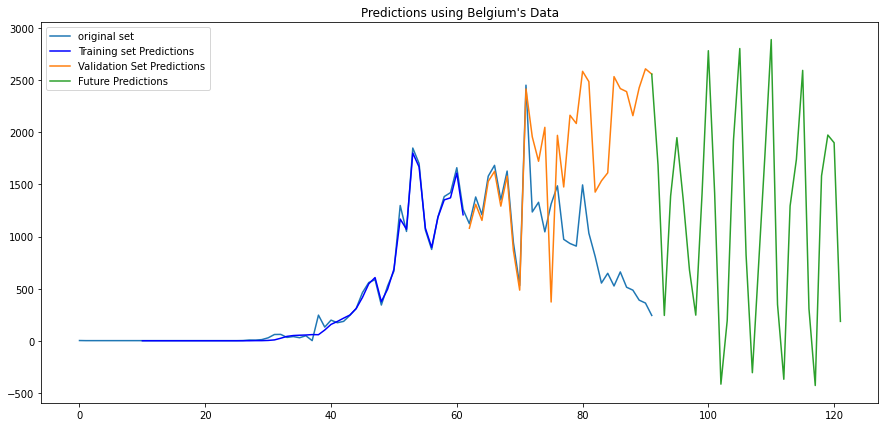

With Canada :
torch.Size([62, 10, 1]) torch.Size([62, 1])
Epoch: 0 Loss: tensor(0.0608)
Epoch: 200 Loss: tensor(0.0002)
Epoch: 400 Loss: tensor(0.0002)
Epoch: 600 Loss: tensor(0.0001)
torch.Size([62, 10, 1]) torch.Size([62, 1])
(31,)
Prediction of cases per day using Canada's data: [ 3346  1604  1337  3889  -504  2409  3890  -469  2969  3565 -1094  5147
  2668 -1781  7495  1996 -2226  8587  2189 -2481  9352  2459 -2690 10095
  2711 -2888 10822  2932 -3092 11529  3134]


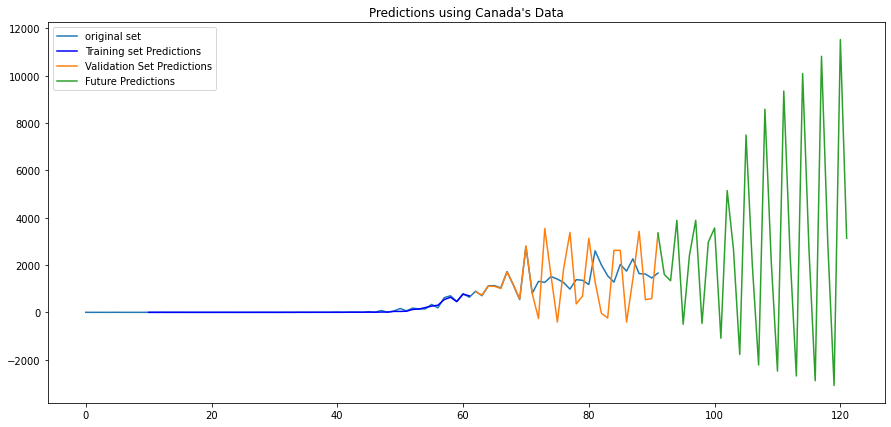

With Romania :
torch.Size([62, 10, 1]) torch.Size([62, 1])
Epoch: 0 Loss: tensor(0.2376)
Epoch: 200 Loss: tensor(0.0125)
Epoch: 400 Loss: tensor(0.0060)
Epoch: 600 Loss: tensor(0.0008)
torch.Size([62, 10, 1]) torch.Size([62, 1])
(31,)
Prediction of cases per day using Romania's data: [217 236 183 223 315 345 270 314 345 327 395 342 276 426 384 408 340 470
 401 376 346 433 418 341 392 409 349 322 400 449 352]


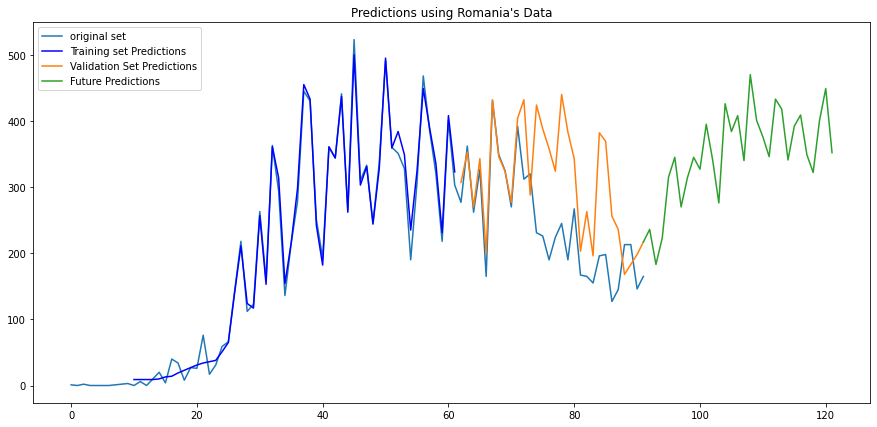

With Israel :
torch.Size([62, 10, 1]) torch.Size([62, 1])
Epoch: 0 Loss: tensor(0.1279)
Epoch: 200 Loss: tensor(0.0081)
Epoch: 400 Loss: tensor(0.0005)
Epoch: 600 Loss: tensor(0.0001)
torch.Size([62, 10, 1]) torch.Size([62, 1])
(31,)
Prediction of cases per day using Israel's data: [ 56  52  36  59  62 106 122 159 160 151 123 500 208 177 195  98 111 127
 110  93  97 139 196 211 230 182 169 115  84 112 125]


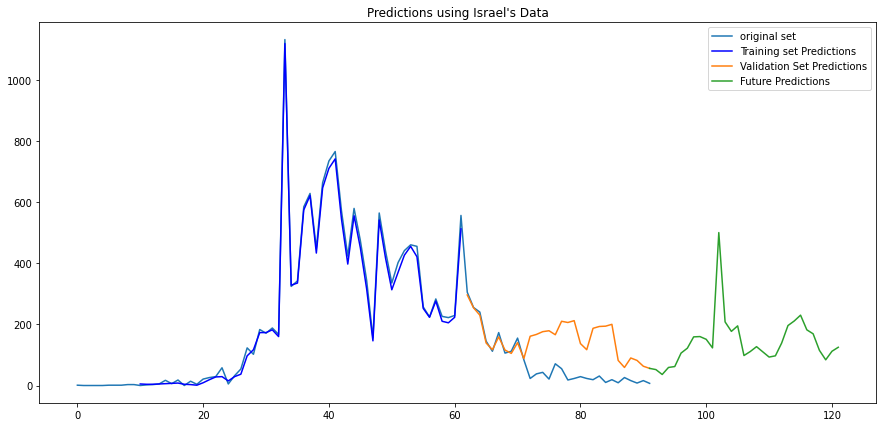

With Russia :
torch.Size([62, 10, 1]) torch.Size([62, 1])
Epoch: 0 Loss: tensor(0.0118)
Epoch: 200 Loss: tensor(4.7421e-05)
Epoch: 400 Loss: tensor(5.1829e-05)
Epoch: 600 Loss: tensor(4.4223e-05)
torch.Size([62, 10, 1]) torch.Size([62, 1])
(31,)
Prediction of cases per day using Russia's data: [1968 1668 1639 1648 1640 1638 1635 1635 1635 1635 1634 1634 1634 1634
 1634 1634 1634 1634 1634 1634 1634 1634 1634 1634 1634 1634 1634 1634
 1634 1634 1634]


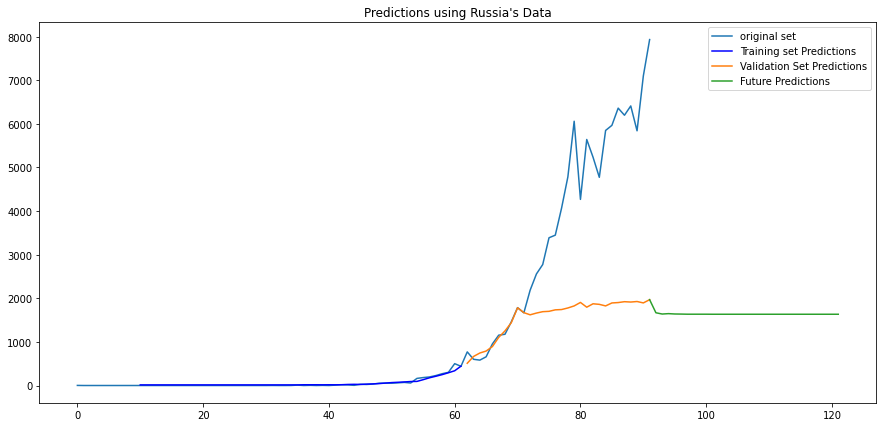

In [0]:
n_features = 1
n_hidden = 92
seq_length = 10

trainSize=62


for c in top5Countries:
  
  cd = list(np.array(df_countries.loc[c]))
  learnWithCountry(c,cd, 31)

# Predicting trend for Pakistan

For Pakistan
torch.Size([62, 10, 1]) torch.Size([62, 1])
Epoch: 0 Loss: tensor(0.0304)
Epoch: 200 Loss: tensor(0.0041)
Epoch: 400 Loss: tensor(0.0015)
Epoch: 600 Loss: tensor(0.0003)
torch.Size([62, 10, 1]) torch.Size([62, 1])
(31,)
Prediction of cases per day using Pakistan's data: [2999 2063 3328 1952 2366 1594 2878 2983 2624 3107 2779 2696 1977 3710
 2598 3817 2886 3255 3131 2670 3605 3077 4209 3208 3754 3287 3295 3639
 3498 4318 3635]


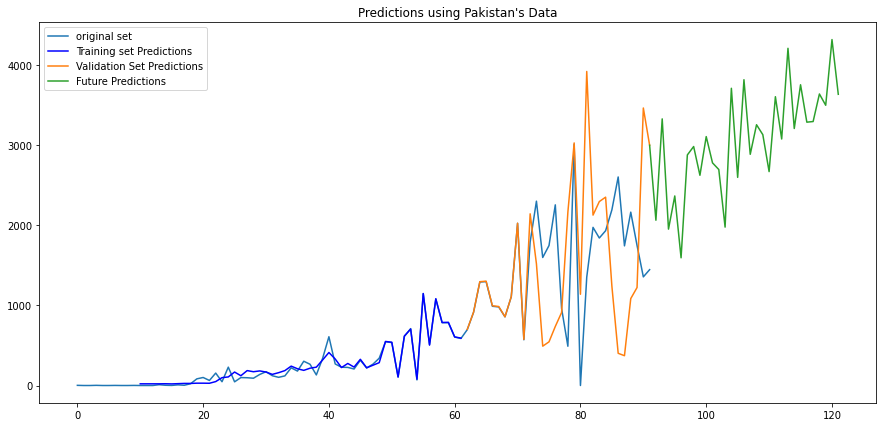

In [0]:
n_hidden = 92
PredictCountry('Pakistan', pak_values, 31)